In [1]:
#make the import
import pandas as pd
import numpy as np

In [2]:
#recall the data
%store -r Xgd
%store -r Ygd
%store -r gd
print(Xgd.shape)

(547, 2074)


In [3]:
#Import the tools we will use to reduce redundant information

import sys
sys.path.append("..")
from source.utils import creat_rollingData, skew_df, mean_df, kurt_df

In [5]:
#using the creat_rollingData

# ___Cell no. 9___

Xgd_arrayRol_sk  = creat_rollingData (df = Xgd, window_arr = [10, 30, 50, 100], method =  skew_df )

# let us see the shape of the created rolled dataframes
for x in Xgd_arrayRol_sk:
    print(x.shape)


(547, 207)
(547, 69)
(547, 41)
(547, 20)


In [6]:
# ___Cell no. 12___

from source.utils import split #  a pre-defined function to split the data into training and testing
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [7]:
Ygd = Ygd.map({'S': 1, 'B': 0})


In [8]:
selected_GDindexes_sk=[]

for x_rol in Xgd_arrayRol_sk:
    Xgd_sk_train,Xgd_sk_test,Ygd_sk_train,Ygd_sk_test=split(x_rol,Ygd)
    print("(Number of samples, number of features) = ", Xgd_sk_train.shape)
    sfs = SequentialFeatureSelector(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=10, direction = 'forward', scoring = 'precision' ) 
    sfs.fit(Xgd_sk_train.values, Ygd_sk_train)
    selected_GDindexes_sk.append(sfs.support_)
    

    

(Number of samples, number of features) =  (382, 207)


/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is i

(Number of samples, number of features) =  (382, 69)


/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(Number of samples, number of features) =  (382, 41)
(Number of samples, number of features) =  (382, 20)


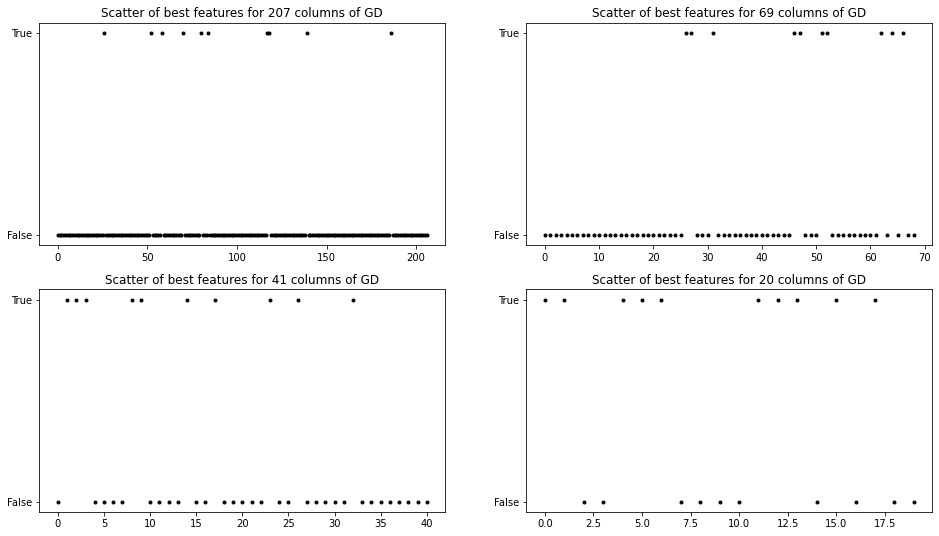

In [9]:
## Scatter Plot
import matplotlib.pyplot as plt
a=selected_GDindexes_sk[0].astype(int)
b=selected_GDindexes_sk[1].astype(int)
c=selected_GDindexes_sk[2].astype(int)
d=selected_GDindexes_sk[3].astype(int)


fig,ax = plt.subplots(2,2,figsize=(16,9))
ax[0, 0].plot(a,'k.',)
ax[0, 0].set_yticks([1.0, 0.0],["True", "False"])
ax[0, 0].title.set_text("Scatter of best features for 207 columns of GD")

ax[0, 1].plot(b,'k.')
ax[0, 1].set_yticks([1.0, 0.0],["True", "False"])
ax[0, 1].title.set_text("Scatter of best features for 69 columns of GD")

ax[1, 0].plot(c,'k.')
ax[1, 0].set_yticks([1.0, 0.0],["True", "False"])
ax[1, 0].title.set_text("Scatter of best features for 41 columns of GD")

ax[1, 1].plot(d,'k.')
ax[1, 1].set_yticks([1.0, 0.0],["True", "False"])
ax[1, 1].title.set_text("Scatter of best features for 20 columns of GD")
plt.show()     

In [10]:
index=[]

for i in range(len(d)):
    if d[i]==1:
        index.append(i)
index

[0, 1, 4, 5, 6, 11, 12, 13, 15, 17]

In [12]:
%store  Xgd_arrayRol_sk
%store  selected_GDindexes_sk

Stored 'Xgd_arrayRol_sk' (list)
Stored 'selected_GDindexes_sk' (list)
